In [369]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [370]:
df = pd.read_csv('smsspamcollection.tsv', sep='\t')
df.head(10)

,label,message,length,punct
0,ham,"Go until jurong point, crazy.. Available only ...",111,9
1,ham,Ok lar... Joking wif u oni...,29,6
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,6
3,ham,U dun say so early hor... U c already then say...,49,6
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,2
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,8
6,ham,Even my brother is not like to speak with me. ...,77,2
7,ham,As per your request 'Melle Melle (Oru Minnamin...,160,6
8,spam,WINNER!! As a valued network customer you have...,157,6
9,spam,Had your mobile 11 months or more? U R entitle...,154,2


In [371]:
df.shape

(5572, 4)

In [372]:
df.isnull().sum()

label      0
message    0
length     0
punct      0
dtype: int64

In [373]:
df['label'].value_counts()

ham     4825
spam     747
Name: label, dtype: int64

In [374]:
df['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

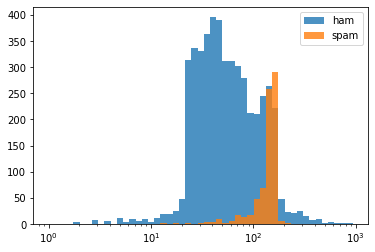

In [375]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.xscale('log')
bins = 1.15**(np.arange(0,50))
plt.hist(df[df['label']=='ham']['length'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['length'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

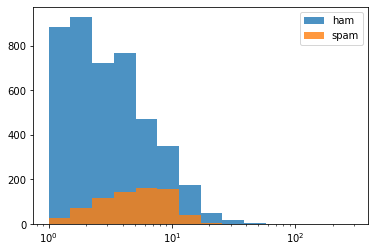

In [376]:
plt.xscale('log')
bins = 1.5**(np.arange(0,15))
plt.hist(df[df['label']=='ham']['punct'],bins=bins,alpha=0.8)
plt.hist(df[df['label']=='spam']['punct'],bins=bins,alpha=0.8)
plt.legend(('ham','spam'))
plt.show()

In [377]:
documents = []
import numpy as np
import re

import pickle
from nltk.corpus import stopwords
# nltk.download('stopwords')

import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
stemmer =  PorterStemmer()

for sen in range(0, len(df['message'])):
  #remove numbers
    document = re.sub(r'\d', ' ', str(df['message'][sen]))
    
   
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = word_tokenize(document)

    document = [stemmer.stem(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

df['message']=documents


In [378]:
df['message']

0       go until jurong point , crazi .. avail onli in...
1                           ok lar ... joke wif u oni ...
2       free entri in a wkli comp to win fa cup final ...
3       u dun say so earli hor ... u c alreadi then sa...
4       nah i do n't think he goe to usf , he live aro...
                              ...                        
5567    thi is the nd time we have tri contact u. u ha...
5568                    will ü b go to esplanad fr home ?
5569    piti , * wa in mood for that . so ... ani othe...
5570    the guy did some bitch but i act like i 'd be ...
5571                            rofl . it true to it name
Name: message, Length: 5572, dtype: object

In [379]:
from sklearn.model_selection import train_test_split

X = df['message'] 

from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()
print(X)
from sklearn.feature_extraction.text import TfidfTransformer
tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

df['label']=(df['label']=='ham').astype(int)
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [380]:
y_train.value_counts()

1    3232
0     501
Name: label, dtype: int64

In [381]:
y_test.value_counts()

1    1593
0     246
Name: label, dtype: int64

In [382]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train) 
y_pred = classifier.predict(X_test)


In [383]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[ 216   30]
 [   0 1593]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94       246
           1       0.98      1.00      0.99      1593

    accuracy                           0.98      1839
   macro avg       0.99      0.94      0.96      1839
weighted avg       0.98      0.98      0.98      1839

0.9836867862969005


In [384]:
# X_train_tfidf
# X_test_tfidf 
# y_train_tfidf
# y_test_tfidf 
#Initialising ANN
ann = tf.keras.models.Sequential()
#Adding First Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Second Hidden Layer
ann.add(tf.keras.layers.Dense(units=6,activation="relu"))
#Adding Output Layer
ann.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))
#Compiling ANN
ann.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])
#Fitting ANN
ann.fit(X_train,y_train,batch_size=32,epochs = 20)

Epoch 1/20
117/117 [==============================] - 1s 2ms/step - loss: 0.6207 - accuracy: 0.8315
Epoch 2/20
117/117 [==============================] - 0s 2ms/step - loss: 0.3836 - accuracy: 0.8733
Epoch 3/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1953 - accuracy: 0.9475
Epoch 4/20
117/117 [==============================] - 0s 2ms/step - loss: 0.1019 - accuracy: 0.9794
Epoch 5/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0637 - accuracy: 0.9850
Epoch 6/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9893
Epoch 7/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0354 - accuracy: 0.9912
Epoch 8/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0285 - accuracy: 0.9941
Epoch 9/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0235 - accuracy: 0.9946
Epoch 10/20
117/117 [==============================] - 0s 2ms/step - loss: 0.0198 - accuracy: 0.9960

In [385]:

ann.predict(X_test)



58/58 [==============================] - 0s 2ms/step


array([[0.9991495 ],
       [0.99460566],
       [0.9996575 ],
       ...,
       [0.99937546],
       [0.99003595],
       [0.99980074]], dtype=float32)

In [386]:
val_loss,val_acc=ann.evaluate(X_test,y_test)

58/58 [==============================] - 0s 2ms/step - loss: 0.0574 - accuracy: 0.9848
